In [1]:
import os, sys

In [11]:
# Import libraries and dataframes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

dataset = "sp100" # Values: asset_class, sectors, ftse

quant_res_df = pd.read_csv("maxclique_quant_%s_res.csv" % (dataset))
class_res_df = pd.read_csv("maxclique_class_%s_res.csv" % (dataset))

quant_res_df = quant_res_df.drop(axis=1, columns=['Unnamed: 0'])
class_res_df = class_res_df.drop(axis=1, columns=['Unnamed: 0'])


         date  threshold   density  \
0  2015-06-05        0.1  0.909613   
1  2016-01-08        0.1  0.898127   
3  2017-03-20        0.1  0.878652   
4  2017-10-20        0.1  0.876654   
5  2018-05-29        0.1  0.891136   
6  2019-01-02        0.1  0.938577   

                                          max_clique  clique_size  \
0  ['ABT', 'ACN', 'AGN', 'AIG', 'AMZN', 'BA', 'BM...           43   
1  ['AAPL', 'ABBV', 'ABT', 'ACN', 'AGN', 'AIG', '...           40   
3  ['AXP', 'BA', 'BAC', 'EMR', 'EXC', 'FB', 'GD',...           23   
4  ['AAPL', 'ACN', 'AIG', 'ALL', 'AMZN', 'BA', 'D...           27   
5  ['AAPL', 'ABT', 'ALL', 'BAC', 'BK', 'BMY', 'CO...           30   
6  ['AAPL', 'ABBV', 'ABT', 'ACN', 'AIG', 'ALL', '...           70   

   valid_clique  computation_time  
0          True          0.008398  
1          True          0.008361  
3          True          0.008514  
4          True          0.008516  
5          True          0.008353  
6          True          0.008241

In [4]:
assert quant_res_df.shape == class_res_df.shape and quant_res_df.columns.equals(class_res_df.columns)

<Figure size 432x288 with 0 Axes>

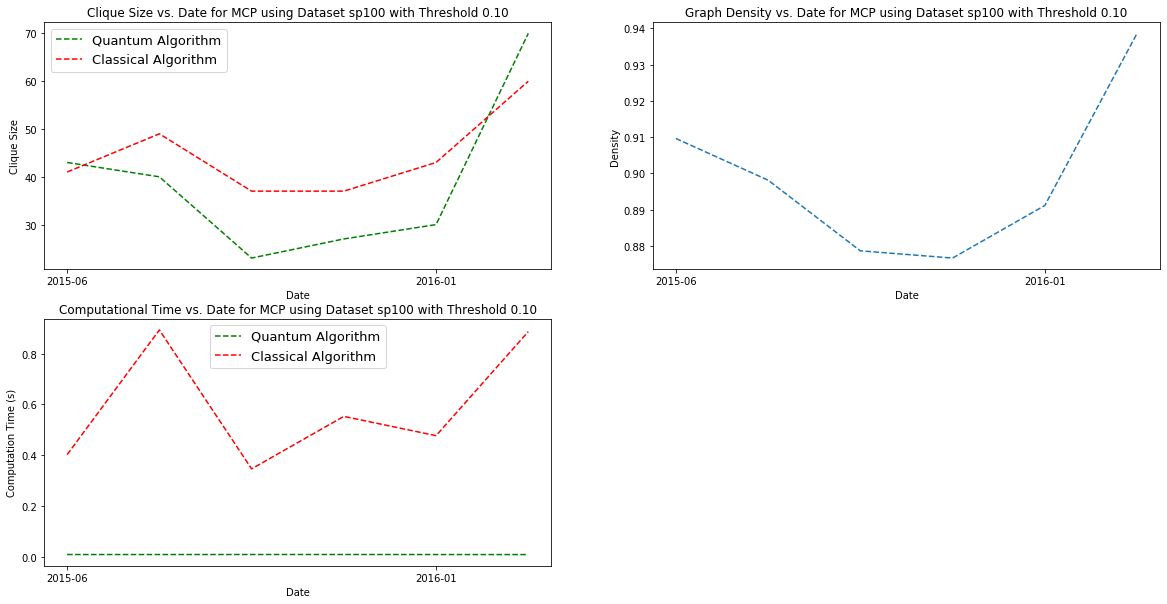

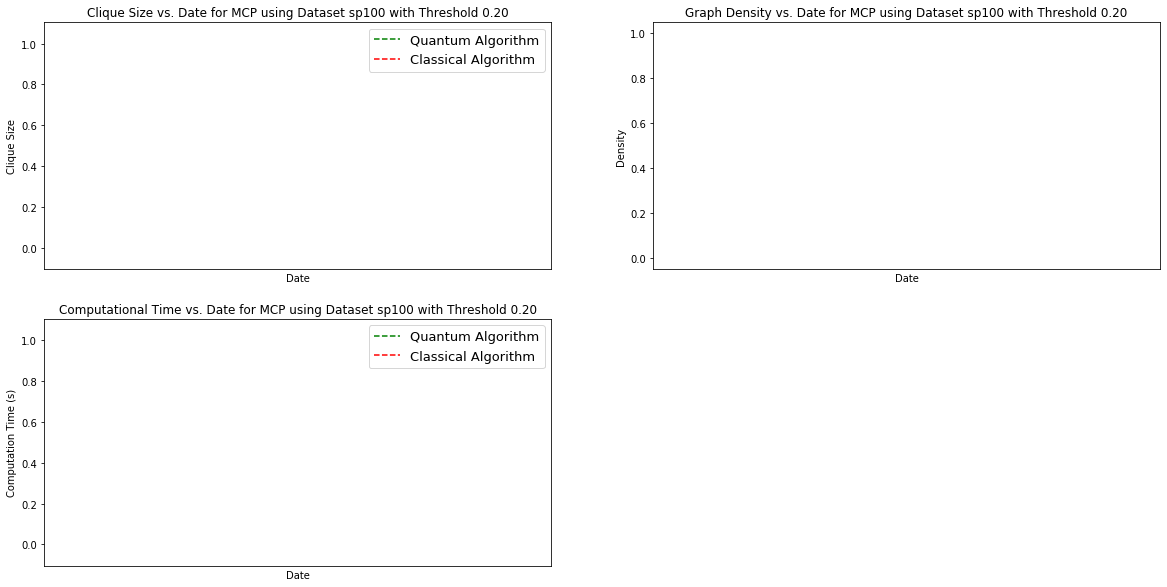

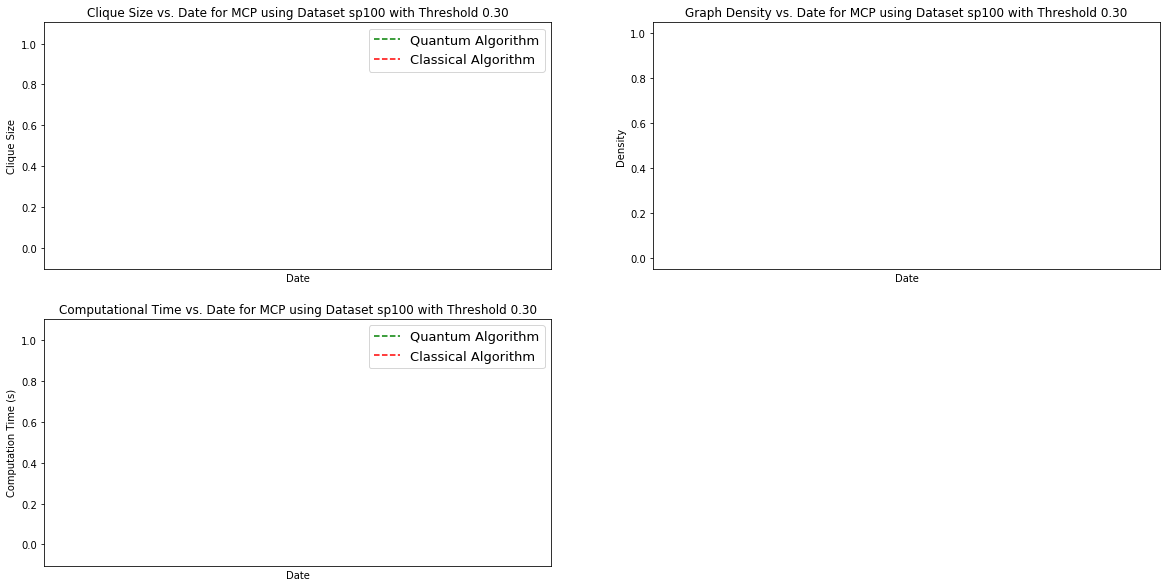

In [5]:
# Plot score vs time for each threshold
thresholds = quant_res_df['threshold'].unique()

i = 1
for thresh in thresholds:
    quant_series = quant_res_df[(quant_res_df.threshold == thresh) & 
                                (quant_res_df.valid_clique == True)]
    class_series = class_res_df[(class_res_df.threshold == thresh) & 
                                (class_res_df.valid_clique == True)]
    class_series = class_series[class_series['date'].isin(quant_series['date'])]
    
    assert quant_series.shape == class_series.shape
    
    fig = plt.figure(i)
    plt.subplots(figsize=(20,10))
    
    plt.subplot(221)
    plt.title('Clique Size vs. Date for MCP using Dataset %s with Threshold %.2f' % (dataset, thresh))
    plt.ylabel('Clique Size')
    plt.xlabel('Date')
    
    plt.plot(quant_series["date"], quant_series['clique_size'], 'g--', label='Quantum Algorithm')
    plt.plot(quant_series["date"], class_series['clique_size'], 'r--', label='Classical Algorithm')
    plt.legend(loc=0, prop={'size': 13})
    plt.xticks(ticks=quant_series['date'][::4], 
              labels=[x[0:7] for x in quant_series['date']])
    
    plt.subplot(222)
    plt.title('Graph Density vs. Date for MCP using Dataset %s with Threshold %.2f' % (dataset, thresh))
    plt.plot(quant_series['date'], quant_series['density'], '--')
    plt.xticks(ticks=quant_series['date'][::4], 
              labels=[x[0:7] for x in quant_series['date']])
    plt.ylabel("Density")
    plt.xlabel("Date")
    
    
    plt.subplot(223)
    plt.title('Computational Time vs. Date for MCP using Dataset %s with Threshold %.2f' % (dataset, thresh))
    plt.ylabel('Computation Time (s)')
    plt.xlabel('Date')
    
    plt.plot(quant_series["date"], quant_series['computation_time'], 'g--', label='Quantum Algorithm')
    plt.plot(quant_series["date"], class_series['computation_time'], 'r--', label='Classical Algorithm')
    plt.legend(loc=0, prop={'size': 13})
    plt.xticks(ticks=quant_series['date'][::4], 
              labels=[x[0:7] for x in quant_series['date']])
    
    i += 1

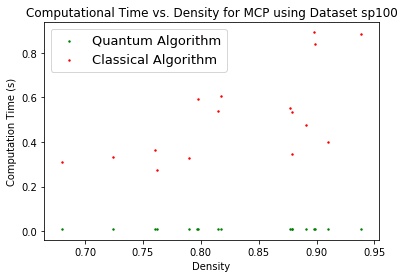

In [6]:
plt.title('Computational Time vs. Density for MCP using Dataset %s' % (dataset))
plt.ylabel('Computation Time (s)')
plt.xlabel('Density')

plt.scatter(quant_res_df["density"], quant_res_df['computation_time'], c='g', s=2, label='Quantum Algorithm')
plt.scatter(class_res_df["density"], class_res_df['computation_time'], c='r', s=2, label='Classical Algorithm')
plt.legend(loc=0, prop={'size': 13})
    

In [7]:
from mpl_toolkits.mplot3d import Axes3D

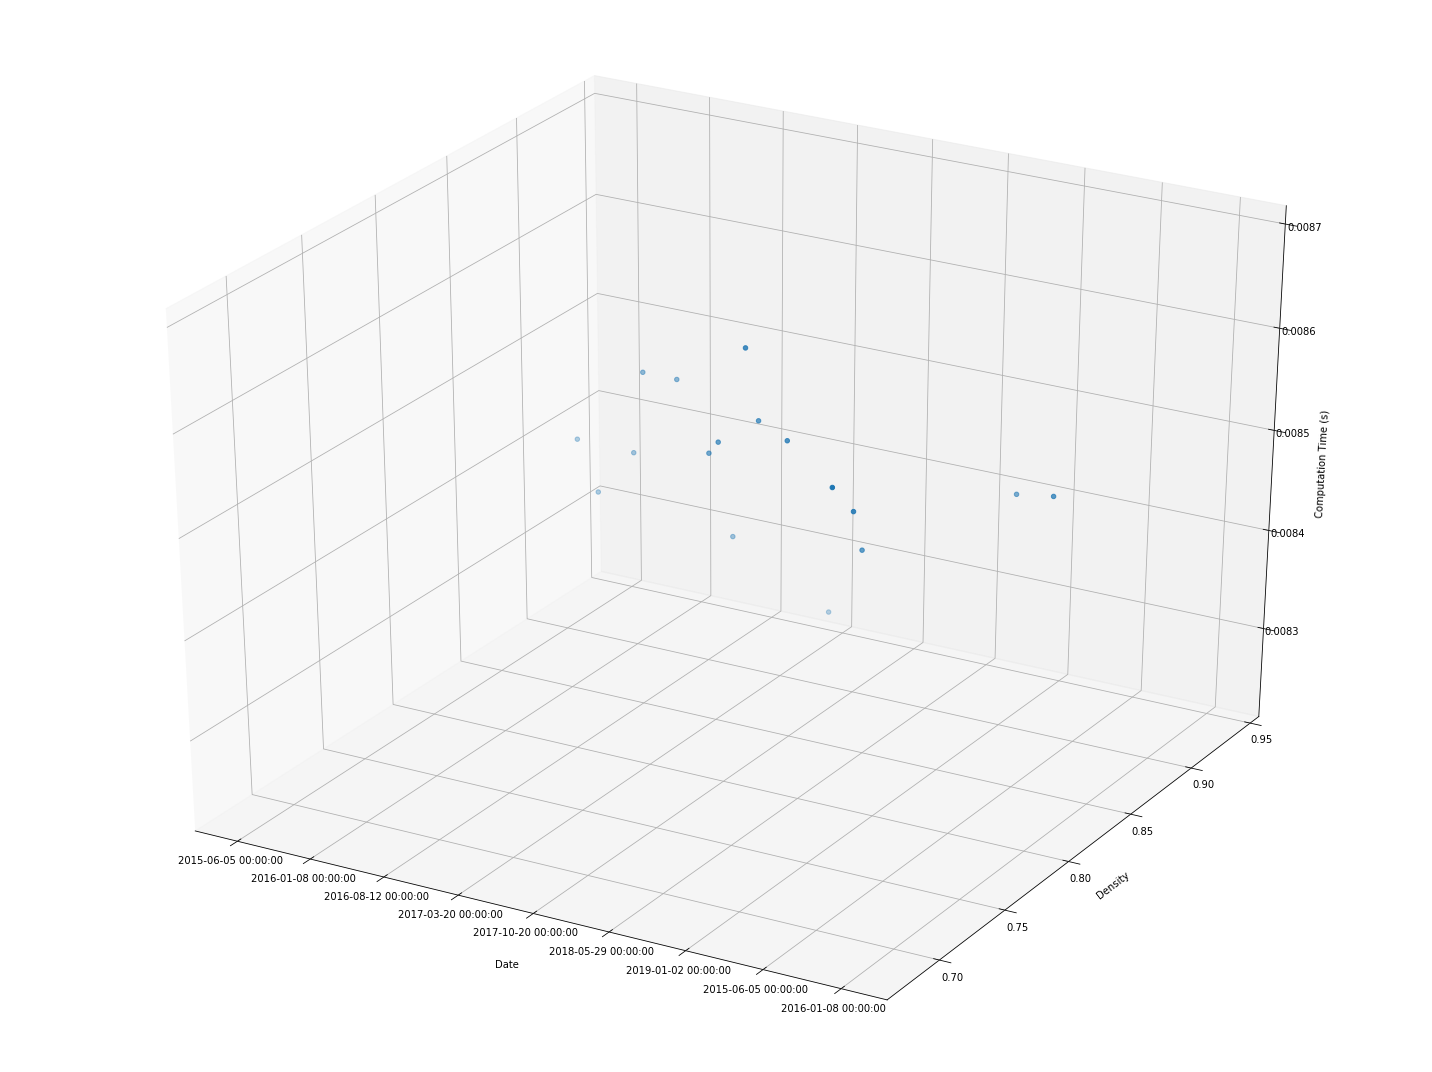

In [8]:
dates_formatted = [pd.to_datetime(d) for d in quant_res_df['date']]
x = list(range(len(quant_res_df['date'])))

fig = plt.figure(figsize=(20,15))

ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, quant_res_df['density'], quant_res_df['computation_time'])
ax.xaxis.set_ticks(x)
ax.xaxis.set_ticklabels(dates_formatted)
ax.xaxis.labelpad = 20
ax.yaxis.labelpad = 10
ax.zaxis.labelpad = 10
ax.set_zlabel('Computation Time (s)')

plt.locator_params(axis='x', nbins=10)
plt.tight_layout()
plt.xlabel('Date')
plt.ylabel('Density')
plt.show()